In [1]:
import pandas as pd
df = pd.read_csv('/Users/nickhausman/Desktop/DATA/P2/home-credit-default-risk/application_train.csv')
df.head()
for col in df.columns:
    if 'MODE' in col or 'AVG' in col:
        df = df.drop(col, axis=1)

In [2]:
corr = df.corr().abs()

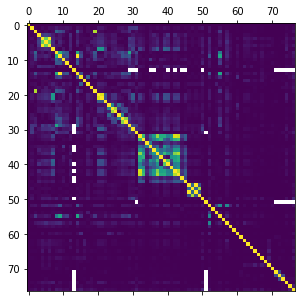

In [3]:
import matplotlib.pyplot as plt

plt.matshow(df.corr().abs())
plt.show()

In [4]:
desc = pd.read_csv('/Users/nickhausman/Desktop/DATA/P2/home-credit-default-risk/HomeCredit_columns_description.csv', encoding = "ISO-8859-1")
desc['Description'][1]

'Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)'

In [5]:
with open('highcorrs.txt', 'w') as f:
    for index, row in corr.iteritems():
        for col in corr.columns:
            if row[col]  > 0.8 and index != col:
                f.write(str(col))
                f.write('\n')
                f.write(str(list(desc[desc['Row'] == col]['Description'])[0]))
                f.write('\n')
                f.write(str(index))
                f.write('\n')
                f.write(str(list(desc[desc['Row'] == index]['Description'])[0]))
                f.write('\n')
                f.write(str(row[col]))
                f.write('\n')
                f.write('\n')
    bad_corr_choice_drops = ['AMT_GOODS_PRICE', 'CNT_CHILDREN', 'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY', 'LIVINGAPARTMENTS_MEDI', 'ELEVATORS_MEDI', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVINGAREA_MEDI']
    f.write(str(bad_corr_choice_drops))
    f.write('\n')

See highcorrs.txt for columns with high correlations, we read through these and picked the more reasonable/understandable ones

In [6]:
df = df.drop(bad_corr_choice_drops, axis=1)
corr = df.corr().abs()
len(df.columns)

78

In [7]:
df.to_csv('noncorrelated_train.csv')
corr.to_csv('corrs_after.csv')

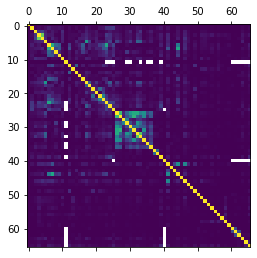

In [8]:
import matplotlib.pyplot as plt

plt.matshow(df.corr().abs())
plt.show()